In [1]:
from scipy.linalg import toeplitz

In [2]:
N = 100

In [3]:
import numpy as np

In [4]:
def solve(N, a=0, b=np.pi, alpha=2, beta=0):
    X = np.linspace(a, b, N+2)
    f = lambda x: np.cos(x) - np.sin(x)
    motif = [2, -1] + [0] * (N-2)
    A = toeplitz(motif, motif)
    h = X[1] - X[0]
    B = f(X[1:-1])
    B *= h**2
    B[0] += alpha
    U = np.linalg.solve(A, B)
    U = np.hstack([alpha, U, beta])
    return X, U

In [5]:
import matplotlib.pyplot as plt

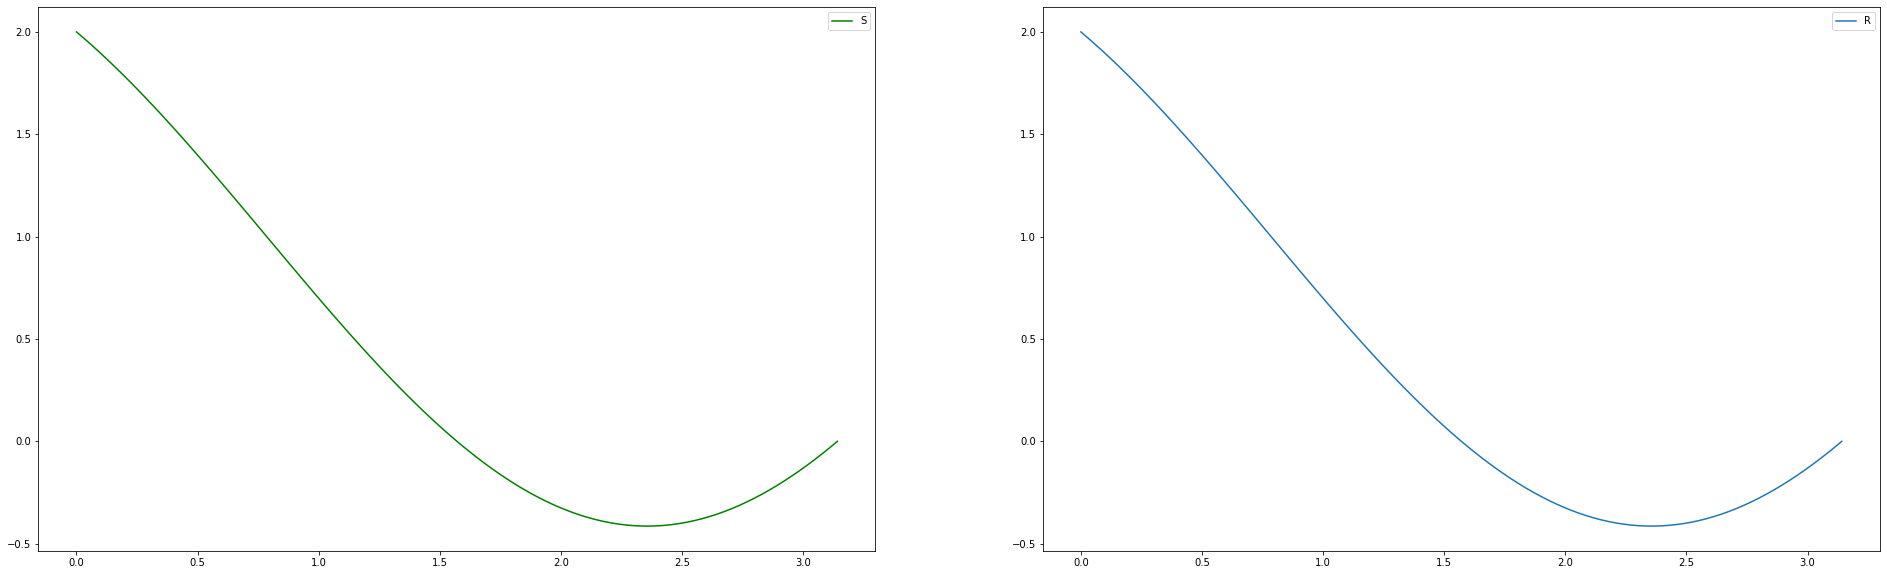

In [7]:
X, U = solve(100)
solution = lambda x: np.cos(x) - np.sin(x) + 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(33, 10))

ax[0].plot(X, U, color='green')
ax[0].legend("Solved solution")
ax[1].plot(X, solution(X))
ax[1].legend("Real solution")
plt.show()

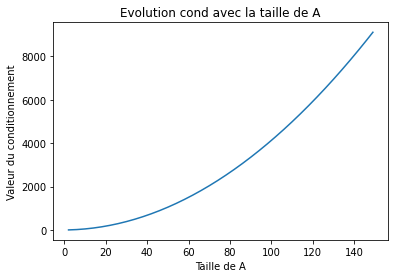

In [8]:
condTab = []
start = 2
end = 150

for N in range(start, end):
    # Calculate A :
    motif = [2, -1] + [0] * (N-2)
    A = toeplitz(motif, motif)
    cond = np.linalg.cond(A)
    condTab.append(cond)

plt.plot(range(start, end), condTab)
plt.title("Evolution cond avec la taille de A")
plt.xlabel("Taille de A")
plt.ylabel("Valeur du conditionnement")
plt.show()

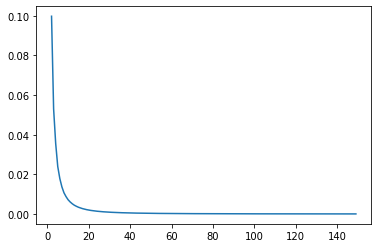

In [9]:
# On trace l'erreur en fonction de N 
err_Tab = []

for N in range(2, 150):
    X, U = solve(N)
    solution = lambda x: np.cos(x) - np.sin(x) + 1
    err = np.max(np.abs(U - solution(X)))
    err_Tab.append(err)

plt.plot(range(2, 150), err_Tab)
plt.show()